In [ ]:
import sys
import os
import importlib
import numpy as np

# widen printing output
np.set_printoptions(linewidth=1000)

project_root = os.path.abspath('..')  # or the absolute path to your project
if project_root not in sys.path:
    sys.path.append(project_root)

import game_utils
importlib.reload(game_utils)

from game_utils import kuhn, utils, LP, Strategy, CFR
importlib.reload(CFR)
importlib.reload(kuhn)
importlib.reload(utils)
importlib.reload(LP)
importlib.reload(Strategy)

MixedStrategy = Strategy.MixedStrategy
PureStrategy = Strategy.PureStrategy

print("Modules reloaded successfully!")

Modules reloaded successfully!


In [ ]:
# Linear programming solve
def LP_Solve(game):
    payoffs = game.convert_to_normal()
    print(payoffs)

    freqs1, value1 = LP.solve_normal_zero_sum(payoffs)
    freqs2, value2 = LP.solve_normal_zero_sum(payoffs, player=1)

    print("Value of the game: ", value1)

    nash_strat1 = MixedStrategy.from_normal_form(freqs1, 0, game)
    print("Player 1 Nash Strategy")
    utils.multiline_print(nash_strat1)
    print("Player 1 info sets:")
    utils.multiline_print(game.info_sets(0))

    nash_strat2 = MixedStrategy.from_normal_form(freqs2, 1, game)
    print("Player 2 Nash Strategy")
    utils.multiline_print(nash_strat2)
    print("Player 2 info sets:")
    utils.multiline_print(game.info_sets(1)) 

def CFR_solve(game, iters=10000):
    solver = CFR.CFRSolver(game)
    solver.train(iters)
    utils.binaryStrategyHeatmap(solver.get_strategy(), transpose=True, figsize=(10, 3))

In [11]:
LP_Solve(kuhn.ThreeCardNoCheck)

[[ 0.          0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.16666667  0.16666667  0.16666667  0.16666667  0.33333333  0.33333333]
 [ 0.33333333 -0.16666667  0.33333333 -0.16666667  0.5         0.          0.5         0.        ]
 [ 0.33333333 -0.16666667  0.5         0.          0.66666667  0.16666667  0.83333333  0.33333333]
 [ 0.66666667  0.16666667  0.16666667 -0.33333333  0.66666667  0.16666667  0.16666667 -0.33333333]
 [ 0.66666667  0.16666667  0.33333333 -0.16666667  0.83333333  0.33333333  0.5         0.        ]
 [ 1.          0.          0.5        -0.5         1.16666667  0.16666667  0.66666667 -0.33333333]
 [ 1.          0.          0.66666667 -0.33333333  1.33333333  0.33333333  1.          0.        ]]


AxisError: axis 1 is out of bounds for array of dimension 1

In [60]:
CFR_solve(ThreeCardNoCheck)
# strategies should agree almost perfectly with the LP solution!

TypeError: Can't instantiate abstract class subclass with abstract methods _get_actions_at_info_set, possible_info_sets, possible_types

In [45]:
LP_Solve(ThreeCard)

Value of the game:  -0.05555555555555556
Player 1 Nash Strategy
{'K': np.float64(1.0), 'B': np.float64(0.0)}
{'F': np.float64(1.0), 'C': np.float64(0.0)}
{'K': np.float64(1.0), 'B': np.float64(0.0)}
{'F': np.float64(0.6666666666666667), 'C': np.float64(0.33333333333333337)}
{'K': np.float64(1.0), 'B': np.float64(0.0)}
{'F': np.float64(0.0), 'C': np.float64(1.0)}
Player 1 info sets:
InfoSet with type: 0, history: 
InfoSet with type: 0, history: KB
InfoSet with type: 1, history: 
InfoSet with type: 1, history: KB
InfoSet with type: 2, history: 
InfoSet with type: 2, history: KB

Player 2 Nash Strategy
{'K': np.float64(0.6666666666666667), 'B': np.float64(0.3333333333333333)}
{'F': np.float64(1.0), 'C': np.float64(0.0)}
{'K': np.float64(1.0), 'B': np.float64(0.0)}
{'F': np.float64(0.6666666666666667), 'C': np.float64(0.3333333333333333)}
{'K': np.float64(0.0), 'B': np.float64(1.0)}
{'F': np.float64(0.0), 'C': np.float64(1.0)}
Player 2 info sets:
InfoSet with type: 0, history: K
InfoSet wi

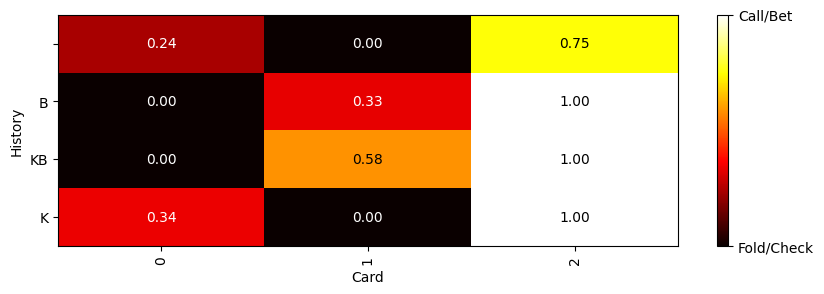

In [51]:
CFR_solve(ThreeCard, 500000)

In [55]:
# the CFR and LP got slightly different solutions.
# LP p1 strategy looks dubious... 
# play both p1 strategies against both p2 strategies.

normal_form = ThreeCard.convert_to_normal()
payoffs, p1_strategies, p2_strategies, infoSets1, infoSets2 = normal_form

freqs1, value1 = LP.solve_normal_zero_sum(normal_form[0])
freqs2, value2 = LP.solve_normal_zero_sum(-normal_form[0].T)

LP_strat1 = utils.normal_strategy_to_extensive(freqs1, p1_strategies, infoSets1)
LP_strat2 = utils.normal_strategy_to_extensive(freqs2, p2_strategies, infoSets2)

solver = CFR.CFRSolver(ThreeCard)
solver.train(50000)


In [56]:
solver.get_strategy()

{InfoSet with type: 1, history: : array([0.99803468, 0.00196532]),
 InfoSet with type: 2, history: K: array([0., 1.]),
 InfoSet with type: 1, history: KB: array([0.43678502, 0.56321498]),
 InfoSet with type: 2, history: B: array([0., 1.]),
 InfoSet with type: 0, history: : array([0.75691701, 0.24308299]),
 InfoSet with type: 0, history: KB: array([1., 0.]),
 InfoSet with type: 0, history: K: array([0.6523252, 0.3476748]),
 InfoSet with type: 0, history: B: array([1., 0.]),
 InfoSet with type: 1, history: K: array([9.99970047e-01, 2.99526748e-05]),
 InfoSet with type: 1, history: B: array([0.66047034, 0.33952966]),
 InfoSet with type: 2, history: : array([0.3009061, 0.6990939]),
 InfoSet with type: 2, history: KB: array([0., 1.])}